# 『3과목』  Data pre-processing

## Self 점검

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


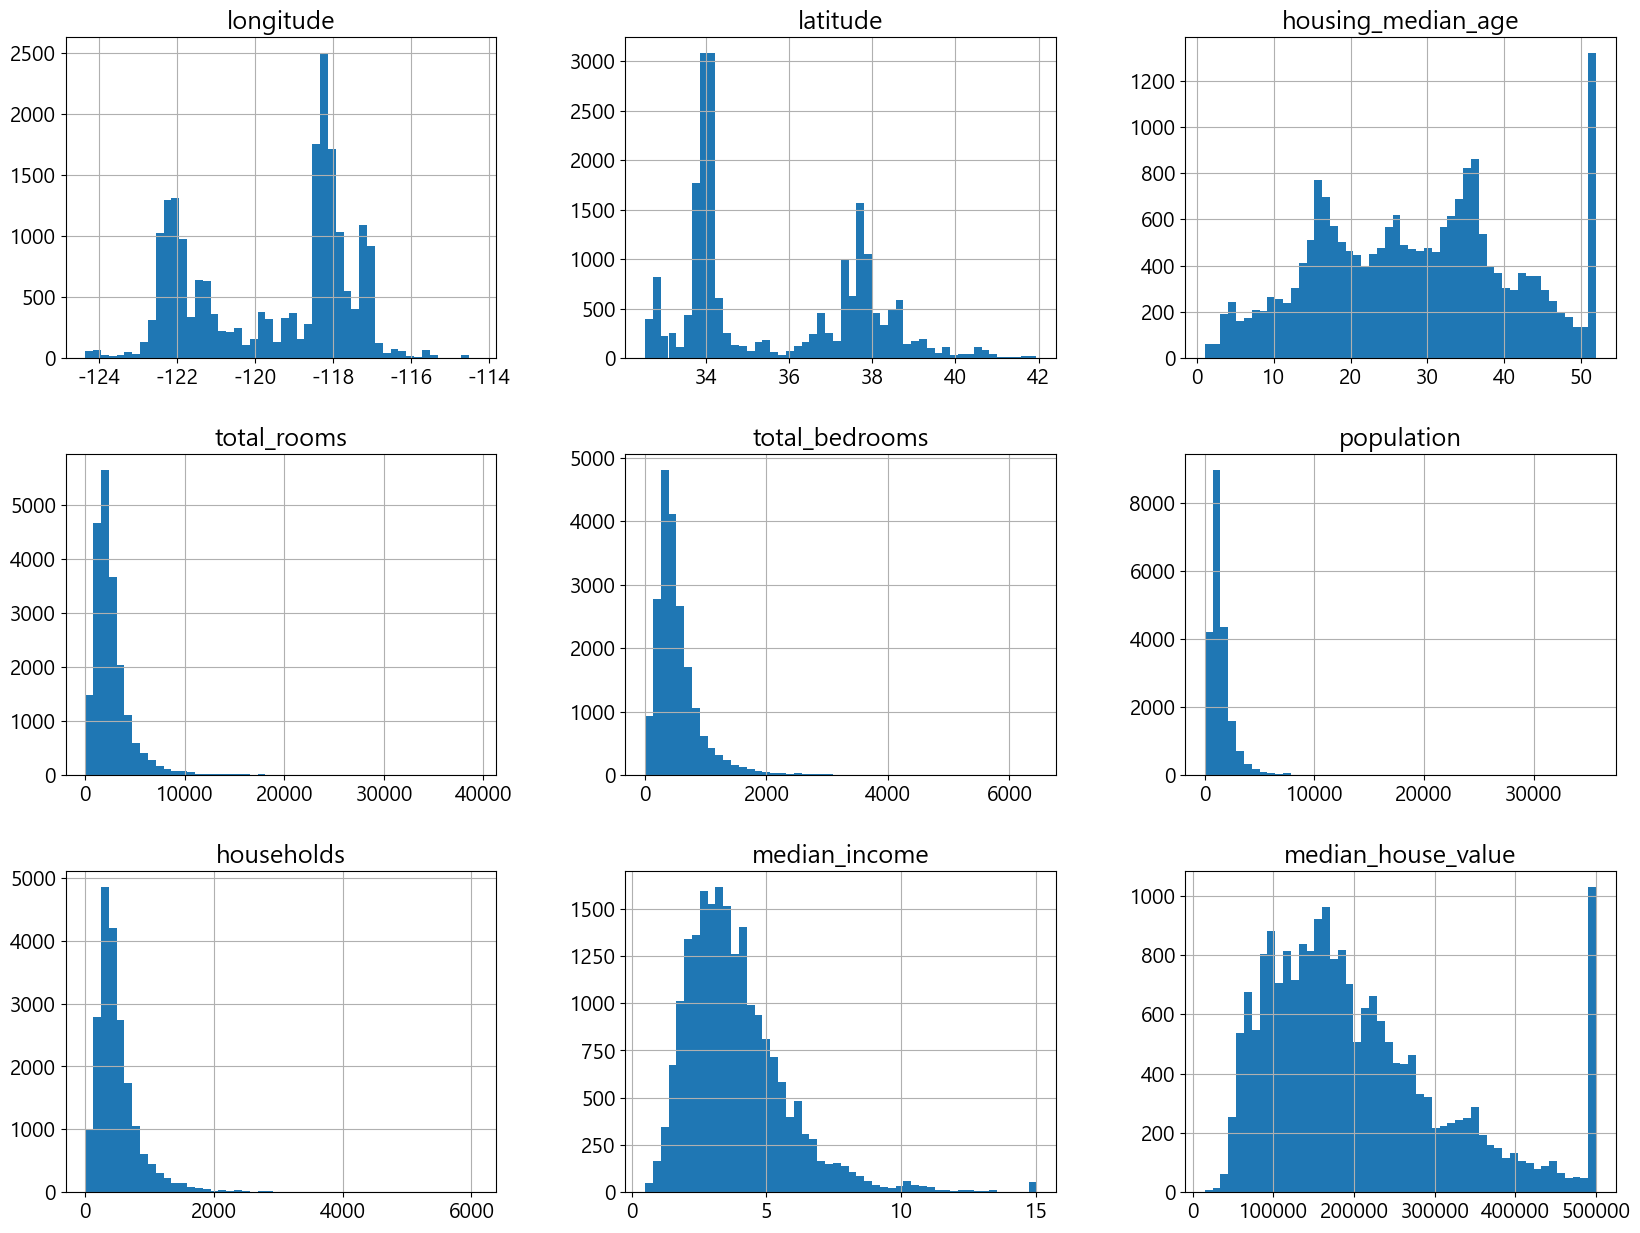

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

[Text(0.5, 0, '경도'), Text(0, 0.5, '위도')]

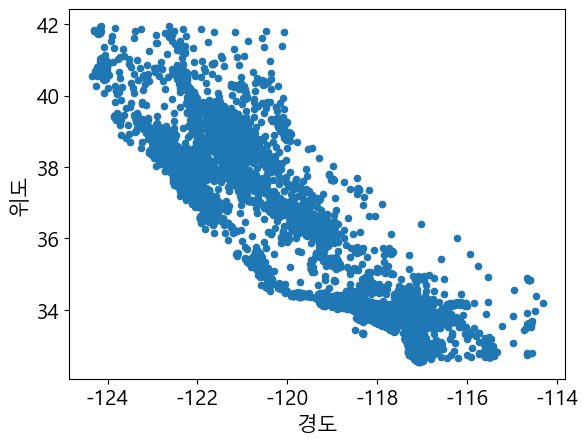

In [10]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude")
ax.set(xlabel='경도', ylabel='위도')

[Text(0.5, 0, '경도'), Text(0, 0.5, '위도')]

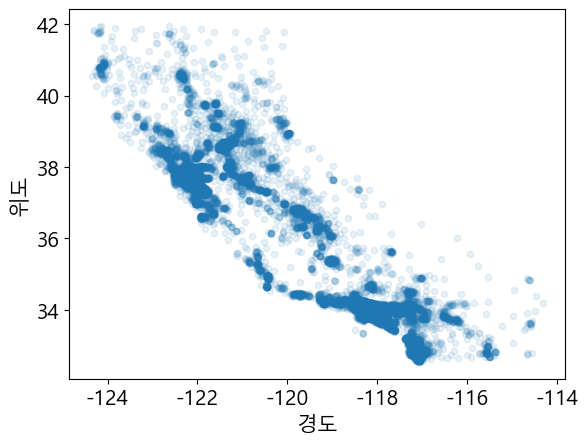

In [11]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
ax.set(xlabel='경도', ylabel='위도')

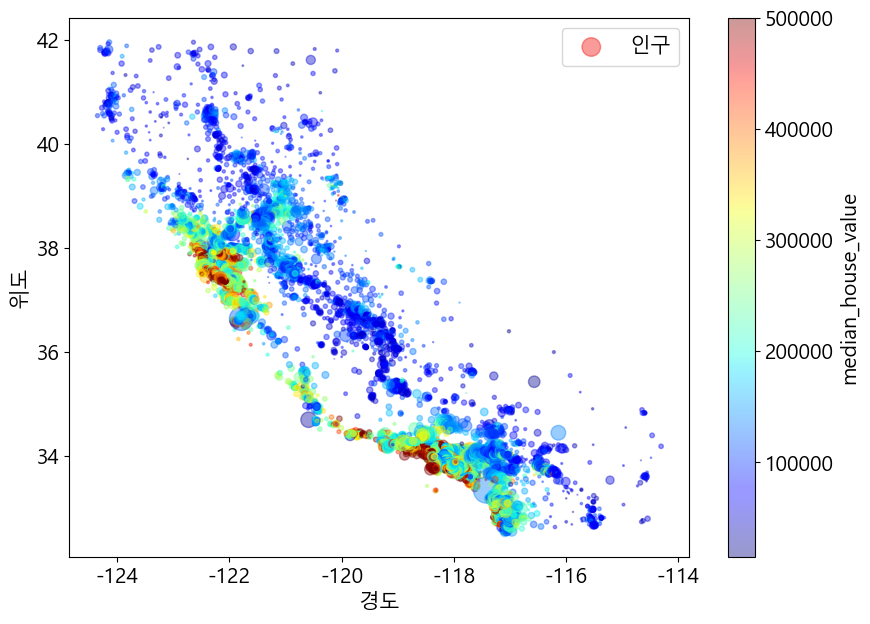

In [12]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="인구", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
ax.set(xlabel='경도', ylabel='위도')
plt.legend()

In [13]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [14]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # 옵션 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [15]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # 옵션 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY


In [16]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # 옵션 3
sample_incomplete_rows

C:\Users\k8s\AppData\Local\Temp\ipykernel_8948\2168292316.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # 옵션 3


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY


In [17]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [18]:
housing_num = housing.drop('ocean_proximity', axis=1)
# 다른 방법: housing_num = housing.select_dtypes(include=[np.number])

In [19]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [20]:
dir(imputer)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_concatenate_indicator',
 '_concatenate_indicator_feature_names_out',
 '_dense_fit',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_fit_dtype',
 '_fit_indicator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_sparse_fit

In [21]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [22]:
housing_num.median().values

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [23]:
X = imputer.transform(housing_num)

In [24]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(housing.index.values))

In [25]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0


In [26]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


 범주형 입력 특성인 `ocean_proximity`을 전처리합니다:

In [27]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
5    NEAR BAY
6    NEAR BAY
7    NEAR BAY
8    NEAR BAY
9    NEAR BAY
Name: ocean_proximity, dtype: object

In [28]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
housing_categories

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(categories='auto')
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>

In [31]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(20640, 5))

In [33]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(categories='auto')
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>

In [34]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [35]:
import numpy as np
# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

In [36]:
# 예시를 위해서 만든 것입니다. 사이킷런에는 train_test_split() 함수가 있습니다.
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [37]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [38]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [39]:
housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임이 반환됩니다.
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [40]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [41]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [42]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [43]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

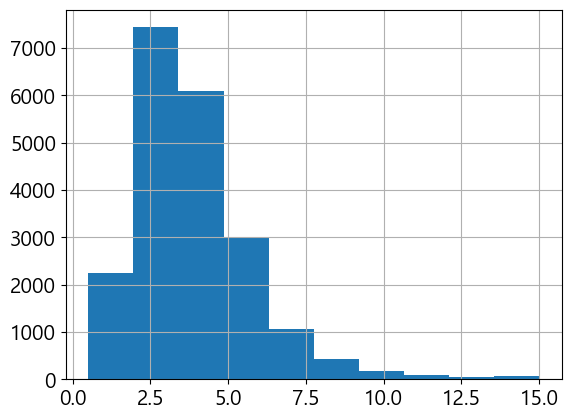

In [44]:
housing["median_income"].hist()

In [45]:
# 소득 카테고리 개수를 제한하기 위해 1.5로 나눕니다.
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# 5 이상은 5로 레이블합니다.
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

C:\Users\k8s\AppData\Local\Temp\ipykernel_8948\1740783389.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


In [46]:
housing["income_cat"].value_counts()

income_cat
3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: count, dtype: int64

<Axes: >

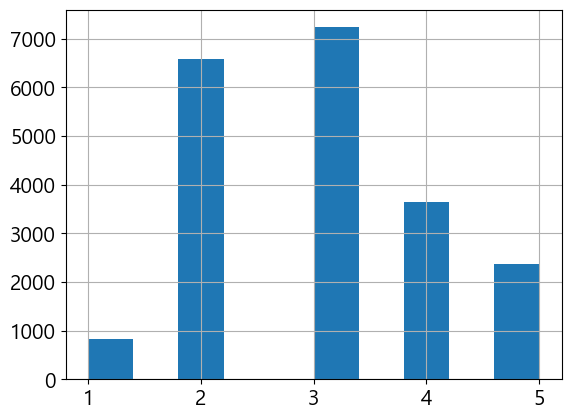

In [47]:
housing["income_cat"].hist()

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [49]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64

In [50]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

In [51]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [52]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1.0,0.039826,0.039971,0.040213,0.973236,0.364964
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [53]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [54]:
housing = strat_train_set.copy()

In [55]:
from sklearn.base import BaseEstimator, TransformerMixin

# 컬럼 인덱스
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [57]:
housing_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -0.04959654, -1.02998783],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.09251223, -0.8888972 ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -0.02584253, -1.29168566],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
        -0.0717345 ,  0.02113407],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
        -0.09122515,  0.09346655],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
        -0.04368215,  0.11327519]], shape=(20640, 12))

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin

# 사이킷런이 DataFrame을 바로 사용하지 못하므로
# 수치형이나 범주형 컬럼을 선택하는 클래스를 만듭니다.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):    
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")
            
        X = check_array(X, dtype=object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self
        
    def transform(self, X):        
        X = check_array(X, accept_sparse='csc', dtype=object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=int)
        X_mask = np.ones_like(X, dtype=bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])
            
            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
            else:
                X_mask[:, i] = valid_mask
                X[:, i][~valid_mask] = self.categories_[i][0]
                
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [60]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [61]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [62]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

C:\Users\k8s\AppData\Local\Temp\ipykernel_8948\118479924.py:60: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  valid_mask = np.in1d(X[:, i], self.categories_[i])


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]], shape=(16512, 17))

In [63]:
housing_prepared.shape

(16512, 17)

In [64]:
housing_labels = strat_train_set["median_house_value"].copy()

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

### Series

In [82]:
import pandas as pd
import numpy as np

In [83]:
pd.Series()

Series([], dtype: object)

In [84]:
pd.Series([100, 200, 300])

0    100
1    200
2    300
dtype: int64

In [85]:
pd.Series(np.array([100, 200, 300]))

0    100
1    200
2    300
dtype: int64

In [86]:
pd.Series(
    [100, 200, 300],
    index = ["A", "B", "C"]
)

A    100
B    200
C    300
dtype: int64

In [87]:
pd.Series({"A": 100, "B": 200, "C": 300})

A    100
B    200
C    300
dtype: int64

In [88]:
george_dupe = pd.Series([10, 7, 1, 22],index=['1968', '1969', '1970', '1971'],name='George Songs')
george_dupe

1968    10
1969     7
1970     1
1971    22
Name: George Songs, dtype: int64

In [89]:
george_dupe.index

Index(['1968', '1969', '1970', '1971'], dtype='object')

In [90]:
george_dupe.values

array([10,  7,  1, 22])

In [91]:
george_dupe.value_counts

<bound method IndexOpsMixin.value_counts of 1968    10
1969     7
1970     1
1971    22
Name: George Songs, dtype: int64>

In [92]:
george_dupe['1968']

np.int64(10)

In [93]:
george_dupe != 1

1968     True
1969     True
1970    False
1971     True
Name: George Songs, dtype: bool

In [94]:
george_dupe.loc[george_dupe != 1]

1968    10
1969     7
1971    22
Name: George Songs, dtype: int64

In [95]:
george_dupe['1969'] = 6
george_dupe['1969']

np.int64(6)

In [96]:
del george_dupe['1971']
george_dupe

1968    10
1969     6
1970     1
Name: George Songs, dtype: int64

###

In [97]:
import pandas as pd

df = pd.DataFrame([[95, 92, 88], [84, 67, 88], [91, 99, 68], [87, 79, 81], [77, 92, 85]],
     index=['A', 'B', 'C', 'D', 'E'],
     columns=['math', 'english', 'history'],
   )
df 

,math,english,history
A,95,92,88
B,84,67,88
C,91,99,68
D,87,79,81
E,77,92,85


In [98]:
import time

# 코드 실행 전 시간 기록
start_time = time.time()

# 실행할 코드 작성
print(df.loc[['A', 'B', 'C'], 'english'])
print(df.iloc[1:3, 0:2])

# 코드 실행 후 시간 기록
end_time = time.time()

# 실행 시간 계산
execution_time = end_time - start_time

# 실행 시간 출력
print("코드 실행 시간:", execution_time, "초")

A    92
B    67
C    99
Name: english, dtype: int64
   math  english
B    84       67
C    91       99
코드 실행 시간: 0.0027136802673339844 초


In [99]:
import time

# 코드 실행 전 시간 기록
start_time = time.time()

# 실행할 코드 작성
print(df.at['C', 'english'])
print(df.iat[4, 0])

# 코드 실행 후 시간 기록
end_time = time.time()

# 실행 시간 계산
execution_time = end_time - start_time

# 실행 시간 출력
print("코드 실행 시간:", execution_time, "초")

99
77
코드 실행 시간: 0.0010721683502197266 초


In [100]:
print(df.loc[['A', 'B', 'C'], ['english', 'history']])

print(df.at['C', 'english'])

print(df.iloc[1:3, 0:2])

print(df.iat[4, 0])

   english  history
A       92       88
B       67       88
C       99       68
99
   math  english
B    84       67
C    91       99
77


Quiz

In [101]:
george_dupe = pd.Series([10, 7, 1, 22],index=['1968', '1969', '1970', '1971'],name='George Songs')
george_dupe

1968    10
1969     7
1970     1
1971    22
Name: George Songs, dtype: int64

In [102]:
print(george_dupe.iloc[0])

print(george_dupe.loc["1968"])

print(george_dupe.iloc[0:3])

print(george_dupe.loc["1968":"1970"])

10
10
1968    10
1969     7
1970     1
Name: George Songs, dtype: int64
1968    10
1969     7
1970     1
Name: George Songs, dtype: int64


In [103]:
george_dupe.at['1970']

np.int64(1)

In [104]:
george_dupe.loc['1970']

np.int64(1)

In [105]:
george_dupe.iloc[0:2]

1968    10
1969     7
Name: George Songs, dtype: int64

Quiz

In [106]:
names = ['민준', '서연', '현우', '민서', '동현', '수빈']
sdata = pd.Series(names)
S1 = sdata[3:6]
print(S1.values)
print(S1)

['민서' '동현' '수빈']
3    민서
4    동현
5    수빈
dtype: object


In [107]:
# 오답
print(S1[1])

KeyError: 1

In [ ]:
# 정답
print(S1[4])

In [ ]:
#일반적인 인덱스 사용 시
b = S1[1:2]
print(b)

####

In [ ]:
mask = george_dupe > 7
mask

In [ ]:
songs_66 = pd.Series([3, None , 11, 9], index=['George', 'Ringo', 'John', 'Paul'], name='Counts')

for value in songs_66:
    print(value)

Quiz

In [ ]:
import pandas as pd
import numpy as np

# 두 개의 Series 생성
songs_66 = pd.Series([3, None, 11, 9], index=['George', 'Ringo', 'John', 'Paul'], name='Counts')
songs_66 = songs_66.replace({None: np.nan})  # None 값을 NaN으로 변경

# 반복문을 통해 songs_66의 각 값을 출력
for value in songs_66:
    print(value)

In [ ]:
import pandas as pd

# 두 개의 Series 생성
songs_66 = pd.Series([3, None, 11, 9], index=['George', 'Ringo', 'John', 'Paul'], name='Counts')

# 반복문을 통해 songs_66의 각 값을 출력
for value in songs_66.dropna():
    print(value)

In [ ]:
import pandas as pd

# 두 개의 Series 생성
songs_66 = pd.Series([3, None, 11, 9], index=['George', 'Ringo', 'John', 'Paul'], name='Counts')
songs_69 = pd.Series([18, 22, 7, 5], index=['John', 'Paul', 'George', 'Ringo'], name='Counts')

# 두 Series를 더한 결과
result = songs_66 + songs_69
print(result)

In [ ]:
songs_66 = pd.Series([3, None, 11, 9], index=['George', 'Ringo', 'John', 'Paul'], name='Counts')

songs_66

In [ ]:
songs_66.index

In [ ]:
songs_66.reset_index()

#####

In [ ]:
import pandas as pd

songs_66 = pd.Series([3, None, 11, 9], index=['George', 'Ringo', 'John', 'Paul'], name='Counts')
reset_songs_66 = songs_66.reset_index()

print(reset_songs_66)

In [ ]:
songs_66 = pd.Series([3, None , 11, 9], index=['George', 'Ringo', 'John', 'Paul'], name='Counts')

songs_66

In [ ]:
songs_66.sum(0)

In [ ]:
songs_66.mean()

In [ ]:
songs_66.median()

In [ ]:
songs_66.quantile()

In [ ]:
songs_66.quantile(.1)

In [ ]:
songs_66.quantile(.9)

In [ ]:
songs_66.describe()

In [ ]:
songs_66.min()

In [ ]:
songs_66.idxmin()

In [ ]:
songs_66.max()

In [ ]:
songs_66.idxmax()

In [ ]:
songs_66.var()

In [ ]:
songs_66.std()

### DataFrame

In [ ]:
import pandas as pd

pd.DataFrame()

In [ ]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# 열을 추가합니다.
dataframe['Name'] = ['Jacky Jackson', 'Steven Stevenson']
dataframe['Age'] = [38, 25]
dataframe['Driver'] = [True, False]

# 데이터프레임을 확인합니다.
dataframe

In [ ]:
pd.DataFrame([[1, 2, 3]])

In [ ]:
pd.DataFrame([[1, 2], [3, 4]])

In [ ]:
import numpy as np
import pandas as pd

data = [ ['Jacky Jackson', 38, True], ['Steven Stevenson', 25, False] ]

pd.DataFrame(data, columns=['Name', 'Age', 'Driver'])

In [ ]:
import numpy as np
import pandas as pd

data = [ ['Jacky Jackson', 38, True], ['Steven Stevenson', 25, False] ]

matrix = np.array(data)
pd.DataFrame(matrix, columns=['Name', 'Age', 'Driver'])

In [ ]:
data = {'Name': ['Jacky Jackson', 'Steven Stevenson'],
        'Age': [38, 25],
        'Driver': [True, False]}
pd.DataFrame(data)

In [ ]:
data = [ {'Name': 'Jacky Jackson', 'Age': 38, 'Driver': True},
         {'Name': 'Steven Stevenson', 'Age': 25, 'Driver': False} ]
pd.DataFrame(data, index=['row1', 'row2'])

Quiz

In [ ]:
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# 열을 만듭니다.
new_person = pd.Series(['Molly Mooney', 40, True], index=['Name','Age','Driver'])

# 방법 1: append() 메서드 사용
dataframe = dataframe.append(new_person, ignore_index=True)

# 결과 확인
print(dataframe)

In [ ]:
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# 열을 추가합니다.
dataframe['Name'] = ['Jacky Jackson', 'Steven Stevenson']
dataframe['Age'] = [38, 25]
dataframe['Driver'] = [True, False]

# 새로운 행을 만듭니다.
new_person = pd.Series(['Molly Mooney', 40, True], index=['Name', 'Age', 'Driver'])

# 방법 2: loc[]을 사용하여 새로운 행 추가
dataframe.loc[len(dataframe)] = new_person

# 결과 확인
print(dataframe)

In [ ]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터를 적재합니다.
dataframe = pd.read_csv("datasets//titanic.csv")

# 두 개의 행을 확인합니다.
dataframe.head(2)

In [ ]:
# 차원을 확인합니다.
dataframe.shape

In [ ]:
pd.DataFrame(
    [[1, 2], [3, 4]],
    columns = ["col1", "col2"]
)

In [ ]:
pd.DataFrame(
    [[1, 2], [3, 4]],
    index = [100, 200]
)

In [ ]:
pd.DataFrame(
    dict(col1 = [1, 2],
         col2 = [3, 4, 5])
)

Quiz

In [ ]:
import numpy as np
import pandas as pd

# 3x4 형태의 랜덤한 숫자로 채워진 2차원 배열 생성
r = np.random.randn(3, 4)
print(r)  # 생성된 랜덤 배열 출력

# 생성된 배열을 DataFrame으로 변환
d = pd.DataFrame(r, index=['one', 'two', 'three'], columns=['a', 'b', 'c', 'd'])
print(d)  # DataFrame 출력

In [ ]:
import numpy as np
import pandas as pd

# 주어진 딕셔너리로 DataFrame 생성
dic = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
    'year': [2000, 2001, 2002, 2001, 2002],
    'pop': [1.5, 1.7, 3.6, 2.4, 2.9]
}
d2 = pd.DataFrame(dic)
d2

In [ ]:
pd.DataFrame(d2, columns = ['year', 'state', 'pop'])

In [ ]:
d2.index

In [ ]:
d2.columns

In [ ]:
3 in d2.index

In [ ]:
'state' in d2.columns

In [ ]:
d['a']

In [ ]:
d2['state']

In [ ]:
d2['debt'] = np.arange(5)
d2

In [ ]:
d2.loc[3]

In [ ]:
d2.iloc[3]

In [ ]:
d2

In [ ]:
d2.T

In [ ]:
data = np.arange(9).reshape((3, 3))
data 

In [ ]:
d3 = pd.DataFrame(data, index=['a', 'b', 'c'],columns=['Ohio', 'Texas', 'California'])
d3 

In [ ]:
d4 = d3.reindex(['a', 'b', 'c', 'd'],fill_value=0)
d4

In [ ]:
d5 = d4.drop('c')
d5 

In [ ]:
d5 = d4.drop(['c', 'd'])
d5

In [ ]:
d5 = d4.drop('Ohio', axis=1)
d5 

In [ ]:
d5 = d4.drop(['Ohio', 'Texas'], axis=1)
d5

In [ ]:
d4.sort_index(ascending=False) # DataFrame d4의 인덱스를 내림차순으로 정렬

In [ ]:
d4.sort_index(axis=1) # DataFrame d4의 열 이름을 기준으로 정렬

In [ ]:
d4.sort_index(ascending=False, axis=1) # DataFrame d4의 열 이름을 내림차순으로 정렬

In [ ]:
d4 

In [ ]:
d4.sum()

In [ ]:
d4.sum(axis=1)

In [ ]:
d4.mean()

In [ ]:
d4.mean(axis=1)

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

score_pd=pd.read_csv('datasets/score.csv')
score_pd.head()

In [ ]:
plt.plot(score_pd['이름'], score_pd['키'])

In [ ]:
plt.plot(score_pd['이름'], score_pd['영어'])
plt.plot(score_pd['이름'], score_pd['수학'])

In [ ]:
plt.plot(score_pd['이름'], score_pd['영어'])
plt.plot(score_pd['이름'], score_pd['수학'])

plt.grid(axis='y', color='purple', alpha=0.5, linestyle='--', linewidth=2)

In [ ]:
plt.scatter(score_pd['영어'], score_pd['수학'])
plt.xlabel('영어 점수')
plt.ylabel('수학 점수')

In [ ]:
import numpy as np
sizes = np.random.rand(8) * 1000
sizes

score_pd['학년'] = [3, 3, 2, 1, 1, 3, 2, 2]

plt.figure(figsize=(7, 7))
plt.scatter(score_pd['영어'], score_pd['수학'], s=sizes, c=score_pd['학년'], cmap='viridis', alpha=0.3)
plt.xlabel('영어 점수')
plt.ylabel('수학 점수')
plt.colorbar(ticks=[1, 2, 3], label='학년', shrink=0.5, orientation='horizontal')

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10)) # 2 x 2 에 해당하는 plot 들을 생성
fig.suptitle('여러 그래프 넣기')

# 첫 번째 그래프
axs[0, 0].bar(score_pd['이름'], score_pd['국어'], label='국어점수') # 데이터 설정
axs[0, 0].set_title('첫 번째 그래프') # 제목
axs[0, 0].legend() # 범례
axs[0, 0].set(xlabel='이름', ylabel='점수') # x, y 축 label
axs[0, 0].set_facecolor('lightyellow') # 전면 색
axs[0, 0].grid(linestyle='--', linewidth=0.5)

# 두 번째 그래프
axs[0, 1].plot(score_pd['이름'], score_pd['수학'], label='수학')
axs[0, 1].plot(score_pd['이름'], score_pd['영어'], label='영어')
axs[0, 1].legend()

# 세 번째 그래프
axs[1, 0].barh(score_pd['이름'], score_pd['키'])

# 네 번째 그래프
axs[1, 1].plot(score_pd['이름'], score_pd['사회'], color='green', alpha=0.5)

### 사례 1 - 공공 데이터 가져오기

In [ ]:
import pandas as pd
URL = 'datasets/한국전력거래소_지역별 시간별 태양광 및 풍력 발전량_20231130.csv'
sunlight = pd.read_csv(URL,encoding='euc-kr')
sunlight.head()

In [ ]:
sunlight.tail()

In [ ]:
sunlight
#print(sunlight)

### BeautifulSoup?

In [ ]:
from urllib.request import urlopen
html = urlopen("https://www.naver.com")
print(html.read())

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen("https://www.naver.com")
bsObj = BeautifulSoup(html.read())
print(bsObj)

### 사례 2 - 한글 웹 페이지 크롤링 후 저장

In [ ]:
pip install requests

In [ ]:
pip install chardet

In [ ]:
import requests                  # 웹 페이지의 HTML을 가져오는 모듈
from bs4 import BeautifulSoup    # HTML을 파싱하는 모듈

# 웹 페이지를 가져온 뒤 BeautifulSoup 객체로 만듦
response = requests.get('https://pythondojang.bitbucket.io/weather/observation/currentweather.html')
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', { 'class': 'table_develop3' })    # <table class="table_develop3">을 찾음
data = []                            # 데이터를 저장할 리스트 생성
for tr in table.find_all('tr'):      # 모든 <tr> 태그를 찾아서 반복(각 지점의 데이터를 가져옴)
    tds = list(tr.find_all('td'))    # 모든 <td> 태그를 찾아서 리스트로 만듦
                                     # (각 날씨 값을 리스트로 만듦)
    for td in tds:                   # <td> 태그 리스트 반복(각 날씨 값을 가져옴)
        if td.find('a'):             # <td> 안에 <a> 태그가 있으면(지점인지 확인)
            point = td.find('a').text    # <a> 태그 안에서 지점을 가져옴
            temperature = tds[5].text    # <td> 태그 리스트의 여섯 번째(인덱스 5)에서 기온을 가져옴
            humidity = tds[9].text       # <td> 태그 리스트의 열 번째(인덱스 9)에서 습도를 가져옴
            data.append([point, temperature, humidity])    # data 리스트에 지점, 기온, 습도를 추가

print(data)   # data 표시. 주피터 노트북에서는 print를 사용하지 않아도 변수의 값이 표시됨)

In [ ]:
import pandas as pd

cn=['region','temperature','humidity']
w_list=pd.DataFrame(data, columns=cn)
w_list

In [ ]:
import os
os.getcwd()

In [ ]:
w_list.to_csv('region_temp_hum.csv',encoding='utf-8-sig')

In [ ]:
import pandas as pd

weather=pd.read_csv('region_temp_hum.csv')
weather.head()